In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

#this is a python magic function to automatically show matplotlib plots
%matplotlib inline      

In [2]:
csv = pd.read_csv('../data/Crisis_2020_redacted.csv', encoding = 'ISO-8859-1', low_memory = False)

In [3]:
allnull = csv.isnull().sum() == 22326 
coldict = allnull.to_dict()

In [4]:
coldict

{'CallReportNum': False,
 'ReportVersion': False,
 'LinkedToCallReportNum': True,
 'CallDateAndTimeStart': False,
 'CallDateAndTimeEnd': False,
 'CallLength': False,
 'CallerNum': False,
 'PhoneWorkerNum': False,
 'WasRealCall': True,
 'WasHangup': True,
 'WasSexCall': True,
 'WasWrongNumber': True,
 'WasPrankCall': True,
 'WasSilentCall': True,
 'GeoCode': True,
 'GeoAssignment': True,
 'CityName': False,
 'CountyName': False,
 'StateProvince': False,
 'CountryName': False,
 'PostalCode': False,
 'ThirdPartyStateProvince': False,
 'ThirdPartyPostalCode': False,
 'Feedback': False,
 'CallersFeedback': False,
 'TextField2': True,
 'TextField3': True,
 'TextField4': True,
 'TextField5': True,
 'TextField6': True,
 'TextField7': True,
 'TextField8': True,
 'TextField9': True,
 'TextField10': True,
 'EnteredByWorkerNum': False,
 'EnteredOn': False,
 'Supervisor': True,
 'Reviewed': False,
 'FeedbackStatus': False,
 'FeedbackFromPhoneWorkerNum': False,
 'FeedbackFromPhoneWorkerName': False,

In [5]:
cols = list(csv.columns.values)
cols

['CallReportNum',
 'ReportVersion',
 'LinkedToCallReportNum',
 'CallDateAndTimeStart',
 'CallDateAndTimeEnd',
 'CallLength',
 'CallerNum',
 'PhoneWorkerNum',
 'WasRealCall',
 'WasHangup',
 'WasSexCall',
 'WasWrongNumber',
 'WasPrankCall',
 'WasSilentCall',
 'GeoCode',
 'GeoAssignment',
 'CityName',
 'CountyName',
 'StateProvince',
 'CountryName',
 'PostalCode',
 'ThirdPartyStateProvince',
 'ThirdPartyPostalCode',
 'Feedback',
 'CallersFeedback',
 'TextField2',
 'TextField3',
 'TextField4',
 'TextField5',
 'TextField6',
 'TextField7',
 'TextField8',
 'TextField9',
 'TextField10',
 'EnteredByWorkerNum',
 'EnteredOn',
 'Supervisor',
 'Reviewed',
 'FeedbackStatus',
 'FeedbackFromPhoneWorkerNum',
 'FeedbackFromPhoneWorkerName',
 'ReferralsMade',
 'IPAddress',
 'OrgNum',
 'VolIdentifier',
 'CRISIS Demographics - Date of Birth',
 'CRISIS Demographics - Exact Age',
 'CRISIS Demographics - Occupation',
 'CRISIS Demographics - Suffix',
 'CRISIS Diocese Case Management Plan - Other details about 

In [6]:
null_list = []
for value in cols:
    if coldict[value] == True:
        null_list += [value]

In [7]:
null_list

['LinkedToCallReportNum',
 'WasRealCall',
 'WasHangup',
 'WasSexCall',
 'WasWrongNumber',
 'WasPrankCall',
 'WasSilentCall',
 'GeoCode',
 'GeoAssignment',
 'TextField2',
 'TextField3',
 'TextField4',
 'TextField5',
 'TextField6',
 'TextField7',
 'TextField8',
 'TextField9',
 'TextField10',
 'Supervisor',
 'IPAddress',
 'VolIdentifier',
 'CRISIS Demographics - Date of Birth',
 'CRISIS Demographics - Exact Age',
 'CRISIS Demographics - Suffix',
 'CRISIS Diocese Case Management Plan - Other details about support needed',
 'CRISIS Other person with information on case - Address',
 'CRISIS Other person with information on case - Name',
 'CRISIS Other person with information on case - Phone',
 'CRISIS PQI (Admin Only) - Staff clarification about correction',
 'NSPL Phone Line - NSPL - Email',
 'CRISIS Assessment - Call Resolutions',
 'CRISIS Assessment - Did you have to create safety plan for caller?',
 'CRISIS Assessment - How many minutes did it take to document this call?',
 'CRISIS Asses

In [8]:
csv = csv.drop(columns = null_list)
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22326 entries, 0 to 22325
Data columns (total 82 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   CallReportNum                                                                                                     22326 non-null  int64  
 1   ReportVersion                                                                                                     22326 non-null  object 
 2   CallDateAndTimeStart                                                                                              22326 non-null  object 
 3   CallDateAndTimeEnd                                                                                                22326 non-null  object 
 4   CallLength                  

In [9]:
csv['CallDateAndTimeStart'] = pd.DatetimeIndex(csv['CallDateAndTimeStart'])
csv['CallDateAndTimeEnd'] = pd.DatetimeIndex(csv['CallDateAndTimeEnd'])

In [10]:
csv['start_time'] = pd.DatetimeIndex(csv['CallDateAndTimeStart']).time


In [64]:
repeat_callers = csv.loc[csv['CallerNum'] > 0]

In [12]:
repeat_callers.CallerNum.value_counts()

2270935    652
1155260    544
1033478    468
1030347    459
1029822    410
3048547    325
1314449    317
1025380    284
1031947    268
2003009    258
2479348    256
1033354    241
1690625    213
1144311    186
3620809    153
3511611    137
1790540    135
3346390    131
3835361    120
3425890    117
1030301    116
3519620    114
3449539    101
1033159    101
1030262     93
2588065     82
2479370     77
3116645     72
1802329     68
1690605     66
1128346     52
1822446     49
1758167     44
1030233     43
3769693     39
2208581     37
2205941     31
1033485     27
2885641     26
1032539     25
2401769     21
2755895     19
1033761     19
1029813     17
2270931     13
1853895     13
3211348      6
1033372      5
1667946      4
1690617      4
1847470      3
2479377      3
3451659      2
2393358      2
1984960      1
1032030      1
2479317      1
1031871      1
Name: CallerNum, dtype: int64

In [13]:
repeat_callers.to_csv('../data/repeat_callers.csv')

In [65]:
one_time_callers = csv.loc[csv['CallerNum'] < 0]

In [16]:
csv.reset_index()
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22326 entries, 0 to 22325
Data columns (total 83 columns):
 #   Column                                                                                                            Non-Null Count  Dtype         
---  ------                                                                                                            --------------  -----         
 0   CallReportNum                                                                                                     22326 non-null  int64         
 1   ReportVersion                                                                                                     22326 non-null  object        
 2   CallDateAndTimeStart                                                                                              22326 non-null  datetime64[ns]
 3   CallDateAndTimeEnd                                                                                                22326 non-null  dateti

In [17]:
type(csv.CallDateAndTimeStart[0])
type(csv.CallDateAndTimeEnd[0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
type(csv.CallDateAndTimeEnd[0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
csv.CallReportNum.nunique()

22326

In [20]:
csv.CallerNum.nunique()

59

In [21]:
null_count = csv.isnull().sum()
null_count = null_count.to_dict()
null_count

{'CallReportNum': 0,
 'ReportVersion': 0,
 'CallDateAndTimeStart': 0,
 'CallDateAndTimeEnd': 0,
 'CallLength': 0,
 'CallerNum': 0,
 'PhoneWorkerNum': 0,
 'CityName': 11353,
 'CountyName': 11315,
 'StateProvince': 58,
 'CountryName': 11285,
 'PostalCode': 13386,
 'ThirdPartyStateProvince': 11455,
 'ThirdPartyPostalCode': 22325,
 'Feedback': 10852,
 'CallersFeedback': 22281,
 'EnteredByWorkerNum': 0,
 'EnteredOn': 0,
 'Reviewed': 0,
 'FeedbackStatus': 0,
 'FeedbackFromPhoneWorkerNum': 10846,
 'FeedbackFromPhoneWorkerName': 10847,
 'ReferralsMade': 19592,
 'OrgNum': 0,
 'CRISIS Demographics - Occupation': 21525,
 'CRISIS SOSL Call - Caller Email (Optional for interest in SOSL Group)': 22312,
 'CRISIS Success Story - Does this call have a success story? If so please describe:': 21820,
 'CRISIS Unsuccessful Outcome - If checked please add reason for Unsuccessful Resolution:': 22323,
 'NSPL Phone Line - NSPL - If Veteran why didnt they press 1 for Veterans when calling Lifeline other reason?

(array([1.7617e+04, 3.9070e+03, 6.2800e+02, 1.3700e+02, 3.2000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  17.5,  35. ,  52.5,  70. ,  87.5, 105. , 122.5, 140. ,
        157.5, 175. ]),
 <BarContainer object of 10 artists>)

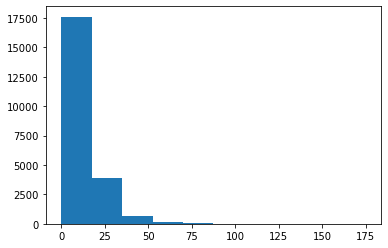

In [22]:
plt.hist(csv.CallLength)

In [23]:
unknown_callers = csv.loc[csv['CallerNum'] == -1]
unknown_callers = unknown_callers.reset_index()
unknown_callers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15254 entries, 0 to 15253
Data columns (total 84 columns):
 #   Column                                                                                                            Non-Null Count  Dtype         
---  ------                                                                                                            --------------  -----         
 0   index                                                                                                             15254 non-null  int64         
 1   CallReportNum                                                                                                     15254 non-null  int64         
 2   ReportVersion                                                                                                     15254 non-null  object        
 3   CallDateAndTimeStart                                                                                              15254 non-null  dateti

In [24]:
unknown_callers.isnull().sum()

index                                                                                                 0
CallReportNum                                                                                         0
ReportVersion                                                                                         0
CallDateAndTimeStart                                                                                  0
CallDateAndTimeEnd                                                                                    0
                                                                                                  ...  
NSPL Phone Line - NSPL - Did you complete a warm transfer to the Veterans Crisis Line?            15191
NSPL Phone Line - NSPL - If Veteran why didnt they press 1 for Veterans when calling Lifeline?    15198
Transfer Information - Were you transferred to this line from another crisis line or agency?      14377
Transfer Information - Which line/agency transferred you to this

In [66]:
crisis_cols = csv.columns.str.contains('crisis issues',
                                        case=False)
crisis_indices = [i for i, col in enumerate(crisis_cols) if col]
csv_crisis = csv.iloc[:, np.r_[0, 5, crisis_indices]]

# Caleb's approach:
# sub = csv.filter(regex=‘CRISIS Issues’)

In [26]:
csv_crisis.isnull().sum()

CallReportNum                                         0
CallerNum                                             0
CRISIS Issues - Abusive Behavior                  21341
CRISIS Issues - Emotional State                    6448
CRISIS Issues - Financial/Basic Needs             21448
CRISIS Issues - Health/Physical                   20155
CRISIS Issues - Homicide                          22300
CRISIS Issues - Information or Services Needed    21275
CRISIS Issues - Mental Health                     13512
CRISIS Issues - No Issue Call                     21686
CRISIS Issues - Other Description                 20950
CRISIS Issues - Relationships                     12190
CRISIS Issues - Substances                        21199
CRISIS Issues - Suicide                           20290
dtype: int64

In [27]:
csv_crisis.CallerNum.value_counts()

-1          15254
 2270935      652
 1155260      544
 1033478      468
 1030347      459
 1029822      410
 3048547      325
 1314449      317
 1025380      284
 1031947      268
 2003009      258
 2479348      256
 1033354      241
 1690625      213
 1144311      186
 3620809      153
 3511611      137
 1790540      135
 3346390      131
 3835361      120
 3425890      117
 1030301      116
 3519620      114
 1033159      101
 3449539      101
 1030262       93
 2588065       82
 2479370       77
 3116645       72
 1802329       68
 1690605       66
 1128346       52
 1822446       49
 1758167       44
 1030233       43
 3769693       39
 2208581       37
 2205941       31
 1033485       27
 2885641       26
 1032539       25
 2401769       21
 1033761       19
 2755895       19
 1029813       17
 1853895       13
 2270931       13
 3211348        6
 1033372        5
 1667946        4
 1690617        4
 1847470        3
 2479377        3
 3451659        2
 2393358        2
 1031871  

In [67]:
csv.sort_values('start_time')

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,...,CRISIS/LIFELINE Imminent Risk - 6. If yes to #4 were emergency services dispatched?,CRISIS/LIFELINE Imminent Risk - 7. Third-party caller concerned about homicidal ideation in another person,CRISIS/LIFELINE Imminent Risk - Was suicidal ideation present?,CRISIS/LIFLINE THIRD-PARTY IMMINENT RISK - Imminent risk for suicide for third party call?,NSPL Phone Line - NSPL - Did you complete a warm transfer to the Veterans Crisis Line?,NSPL Phone Line - NSPL - If Veteran why didnt they press 1 for Veterans when calling Lifeline?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?,start_time,timeframe
5467,79659271,Crisis,2020-10-11 00:00:00,2020-10-11 00:13:00,13,3048547,140958,Madison,Davidson,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,late_night
19472,71377225,Crisis,2020-03-04 00:00:00,2020-03-04 00:03:00,3,-1,116928,NaN,NaN,TN,...,NaN,NaN,c. No,NaN,NaN,NaN,NaN,NaN,00:00:00,late_night
16716,73282946,Crisis,2020-04-22 00:00:00,2020-04-22 00:30:00,30,2401769,101461,NaN,NaN,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,late_night
16864,73173817,Crisis,2020-04-19 00:00:00,2020-04-19 00:20:00,20,-1,101461,NaN,NaN,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,late_night
10694,76861709,Crisis,2020-07-27 00:00:00,2020-07-27 00:08:00,8,2270935,116928,NaN,NaN,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,late_night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,77235786,Crisis,2020-08-05 23:59:00,2020-08-06 00:09:00,10,1025380,116928,White House,Robertson,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:59:00,evening
16064,73722314,Crisis,2020-05-03 23:59:00,2020-05-04 00:25:00,26,-1,136748,NaN,NaN,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:59:00,evening
6815,78936576,Crisis,2020-09-21 23:59:00,2020-09-22 00:07:00,8,2270935,140958,NaN,NaN,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:59:00,evening
17368,72811987,Crisis,2020-04-09 23:59:00,2020-04-10 00:05:00,6,-1,116928,NaN,NaN,TN,...,NaN,NaN,c. No,NaN,NaN,NaN,NaN,NaN,23:59:00,evening


In [29]:
sixam = pd.to_datetime('6:00')
noon = pd.to_datetime('12:00')
sixpm = pd.to_datetime('18:00')
midnight = pd.to_datetime('00:00')

In [30]:
times = [sixam, noon, sixpm, midnight]
times = pd.DatetimeIndex(times).time

In [31]:
type(sixam)

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
times

array([datetime.time(6, 0), datetime.time(12, 0), datetime.time(18, 0),
       datetime.time(0, 0)], dtype=object)

In [33]:
sixam, noon, sixpm, midnight = times

In [34]:
sixam

datetime.time(6, 0)

In [35]:
timeframe = []

for index, value in csv.iterrows():
    if value['start_time'] < sixam:
        timeframe += ['late_night']
    elif value['start_time'] < noon:
        timeframe += ['morning']
    elif value['start_time'] < sixpm:
        timeframe += ['afternoon']
    else:
        timeframe += ['evening']
csv['timeframe'] = timeframe

([<matplotlib.axis.XTick at 0x2ce51a98b20>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

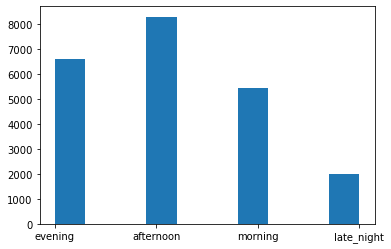

In [36]:
plt.hist('timeframe', data = csv)
plt.xticks(['morning', 'afternoon', 'evening', 'late_night'])

In [37]:
afternoons = csv.loc[csv['timeframe'] == 'afternoon']
afternoons

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,...,CRISIS/LIFELINE Imminent Risk - 6. If yes to #4 were emergency services dispatched?,CRISIS/LIFELINE Imminent Risk - 7. Third-party caller concerned about homicidal ideation in another person,CRISIS/LIFELINE Imminent Risk - Was suicidal ideation present?,CRISIS/LIFLINE THIRD-PARTY IMMINENT RISK - Imminent risk for suicide for third party call?,NSPL Phone Line - NSPL - Did you complete a warm transfer to the Veterans Crisis Line?,NSPL Phone Line - NSPL - If Veteran why didnt they press 1 for Veterans when calling Lifeline?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?,start_time,timeframe
24,82684327,Crisis,2020-12-31 17:48:00,2020-12-31 18:05:00,17,-1,139345,Royston,Franklin,GA,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,17:48:00,afternoon
25,82683276,Crisis,2020-12-31 17:11:00,2020-12-31 17:31:00,20,1030301,136748,Nashville,Wilson,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,17:11:00,afternoon
26,82682313,Crisis,2020-12-31 16:38:00,2020-12-31 16:50:00,12,-1,149954,NaN,NaN,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,16:38:00,afternoon
27,82682221,Crisis,2020-12-31 16:33:00,2020-12-31 16:51:00,18,-1,55555,Chattanooga,Hamilton,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,16:33:00,afternoon
28,82681781,Crisis,2020-12-31 16:20:00,2020-12-31 16:22:00,2,-1,149954,NaN,NaN,TN,...,NaN,NaN,c. No,NaN,NaN,NaN,No,NaN,16:20:00,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22307,69500723,Crisis,2020-01-01 14:46:00,2020-01-01 14:48:00,2,-1,55555,NaN,NaN,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:46:00,afternoon
22308,69500031,Crisis,2020-01-01 14:13:00,2020-01-01 14:23:00,10,1155260,55555,Hendersonville,Sumner,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:13:00,afternoon
22309,69499714,Crisis,2020-01-01 13:57:00,2020-01-01 14:17:00,20,1314449,92180,Memphis,Shelby,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13:57:00,afternoon
22310,69499671,Crisis,2020-01-01 13:51:00,2020-01-01 13:55:00,4,-1,55555,Nashville,Davidson,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13:51:00,afternoon


In [38]:
bigguy = csv.loc[csv['CallerNum'] == 2270935]
bigguy = bigguy.reset_index()
bigguy

,index,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,...,CRISIS/LIFELINE Imminent Risk - 6. If yes to #4 were emergency services dispatched?,CRISIS/LIFELINE Imminent Risk - 7. Third-party caller concerned about homicidal ideation in another person,CRISIS/LIFELINE Imminent Risk - Was suicidal ideation present?,CRISIS/LIFLINE THIRD-PARTY IMMINENT RISK - Imminent risk for suicide for third party call?,NSPL Phone Line - NSPL - Did you complete a warm transfer to the Veterans Crisis Line?,NSPL Phone Line - NSPL - If Veteran why didnt they press 1 for Veterans when calling Lifeline?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?,start_time,timeframe
0,55,82665543,Crisis,2020-12-31 09:11:00,2020-12-31 09:16:00,5,2270935,140958,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,09:11:00,morning
1,63,82697475,Crisis,2020-12-31 00:31:00,2020-12-31 00:38:00,7,2270935,116928,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,00:31:00,late_night
2,113,82634571,Crisis,2020-12-30 12:29:00,2020-12-30 12:31:00,2,2270935,149954,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,12:29:00,afternoon
3,118,82631282,Crisis,2020-12-30 11:13:00,2020-12-30 11:17:00,4,2270935,55555,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,11:13:00,morning
4,128,82622886,Crisis,2020-12-30 07:45:00,2020-12-30 07:47:00,2,2270935,62042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,07:45:00,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,22181,69614440,Crisis,2020-01-05 08:51:00,2020-01-05 08:52:00,1,2270935,87181,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08:51:00,morning
648,22195,69604931,Crisis,2020-01-04 21:26:00,2020-01-04 21:29:00,3,2270935,88564,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21:26:00,evening
649,22196,69603575,Crisis,2020-01-04 20:18:00,2020-01-04 20:23:00,5,2270935,88564,Bloomington,Monroe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20:18:00,evening
650,22291,69511507,Crisis,2020-01-02 03:40:00,2020-01-02 03:50:00,10,2270935,101461,Smyrna,Davidson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03:40:00,late_night


In [39]:
caller_count = csv.CallerNum.value_counts()
callcountdict = caller_count.to_dict()
callcountdict

{-1: 15254,
 2270935: 652,
 1155260: 544,
 1033478: 468,
 1030347: 459,
 1029822: 410,
 3048547: 325,
 1314449: 317,
 1025380: 284,
 1031947: 268,
 2003009: 258,
 2479348: 256,
 1033354: 241,
 1690625: 213,
 1144311: 186,
 3620809: 153,
 3511611: 137,
 1790540: 135,
 3346390: 131,
 3835361: 120,
 3425890: 117,
 1030301: 116,
 3519620: 114,
 1033159: 101,
 3449539: 101,
 1030262: 93,
 2588065: 82,
 2479370: 77,
 3116645: 72,
 1802329: 68,
 1690605: 66,
 1128346: 52,
 1822446: 49,
 1758167: 44,
 1030233: 43,
 3769693: 39,
 2208581: 37,
 2205941: 31,
 1033485: 27,
 2885641: 26,
 1032539: 25,
 2401769: 21,
 1033761: 19,
 2755895: 19,
 1029813: 17,
 1853895: 13,
 2270931: 13,
 3211348: 6,
 1033372: 5,
 1667946: 4,
 1690617: 4,
 1847470: 3,
 2479377: 3,
 3451659: 2,
 2393358: 2,
 1031871: 1,
 1984960: 1,
 1032030: 1,
 2479317: 1}

### was thinking i could create a for loop where for each key, if value greater than 100, then add it to a list, and then we can make a subset of calls with those callernums.

### also the group was wanting me to do a for loop like from the datacamps where we create dicts with value counts for each unique value from the crisis issues. i don't know where we go from there, but seems like a good idea. 

In [40]:
issues_list = []
for c in csv.columns:
    if 'Issues' in c:
        issues_list.append(c)
csv[issues_list]

,CRISIS Issues - Abusive Behavior,CRISIS Issues - Emotional State,CRISIS Issues - Financial/Basic Needs,CRISIS Issues - Health/Physical,CRISIS Issues - Homicide,CRISIS Issues - Information or Services Needed,CRISIS Issues - Mental Health,CRISIS Issues - No Issue Call,CRISIS Issues - Other Description,CRISIS Issues - Relationships,CRISIS Issues - Substances,CRISIS Issues - Suicide
0,NaN,Anxious/Stressed; Job Stress; Lonely,NaN,NaN,NaN,NaN,Medical Related Anxiety,NaN,NaN,NaN,NaN,NaN
1,NaN,Anxious/Stressed,NaN,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,Parent-Child; Peer Group/Friend; Therapist/Med...,NaN,NaN
2,NaN,Anxious/Stressed; Parenting Stress; Overwhelmed,NaN,NaN,NaN,NaN,Other Mental Health,NaN,NaN,Parent-Child; Other Relationships,NaN,NaN
3,NaN,Anger/Hostility,NaN,NaN,NaN,NaN,Anxiety/Panic; Paranoia,NaN,NaN,NaN,NaN,NaN
4,NaN,Anger/Hostility; Overwhelmed,NaN,NaN,NaN,NaN,Other Mental Health,NaN,NaN,Crisis Counselor; Conflict With Other,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22321,NaN,Anxious/Stressed; Overwhelmed; Scared; Moving ...,NaN,NaN,NaN,NaN,Bipolar Disorder (diagnosed),NaN,NaN,NaN,NaN,NaN
22322,NaN,Anxious/Stressed; Lonely ; Sad/Depressed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22323,NaN,Anger/Hostility; Anxious/Stressed; Holiday Stress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obscene/Fantasy Call,NaN,NaN,NaN


In [41]:
#nother option is list comprehension, does the same thing as the above. both of these are ways to subset just crisis issues columns
issues = csv[[c for c in csv.columns if 'CRISIS Issues' in c]]
issues

,CRISIS Issues - Abusive Behavior,CRISIS Issues - Emotional State,CRISIS Issues - Financial/Basic Needs,CRISIS Issues - Health/Physical,CRISIS Issues - Homicide,CRISIS Issues - Information or Services Needed,CRISIS Issues - Mental Health,CRISIS Issues - No Issue Call,CRISIS Issues - Other Description,CRISIS Issues - Relationships,CRISIS Issues - Substances,CRISIS Issues - Suicide
0,NaN,Anxious/Stressed; Job Stress; Lonely,NaN,NaN,NaN,NaN,Medical Related Anxiety,NaN,NaN,NaN,NaN,NaN
1,NaN,Anxious/Stressed,NaN,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,Parent-Child; Peer Group/Friend; Therapist/Med...,NaN,NaN
2,NaN,Anxious/Stressed; Parenting Stress; Overwhelmed,NaN,NaN,NaN,NaN,Other Mental Health,NaN,NaN,Parent-Child; Other Relationships,NaN,NaN
3,NaN,Anger/Hostility,NaN,NaN,NaN,NaN,Anxiety/Panic; Paranoia,NaN,NaN,NaN,NaN,NaN
4,NaN,Anger/Hostility; Overwhelmed,NaN,NaN,NaN,NaN,Other Mental Health,NaN,NaN,Crisis Counselor; Conflict With Other,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22321,NaN,Anxious/Stressed; Overwhelmed; Scared; Moving ...,NaN,NaN,NaN,NaN,Bipolar Disorder (diagnosed),NaN,NaN,NaN,NaN,NaN
22322,NaN,Anxious/Stressed; Lonely ; Sad/Depressed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22323,NaN,Anger/Hostility; Anxious/Stressed; Holiday Stress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obscene/Fantasy Call,NaN,NaN,NaN


In [42]:
emotional_state = issues['CRISIS Issues - Emotional State']
emotional_state

0                    Anxious/Stressed; Job Stress; Lonely 
1                                         Anxious/Stressed
2          Anxious/Stressed; Parenting Stress; Overwhelmed
3                                          Anger/Hostility
4                             Anger/Hostility; Overwhelmed
                               ...                        
22321    Anxious/Stressed; Overwhelmed; Scared; Moving ...
22322             Anxious/Stressed; Lonely ; Sad/Depressed
22323    Anger/Hostility; Anxious/Stressed; Holiday Stress
22324                                                  NaN
22325                                                  NaN
Name: CRISIS Issues - Emotional State, Length: 22326, dtype: object

In [43]:
# to see all the individual items:
emo_list = emotional_state.str.split('; ')

In [44]:
emo_list.dropna().sum()

['Anxious/Stressed',
 'Job Stress',
 'Lonely ',
 'Anxious/Stressed',
 'Anxious/Stressed',
 'Parenting Stress',
 'Overwhelmed',
 'Anger/Hostility',
 'Anger/Hostility',
 'Overwhelmed',
 'Illness/Health Stress',
 'Overwhelmed',
 'Anxious/Stressed',
 'Scared',
 'Anxious/Stressed',
 'Sad/Depressed',
 'Overwhelmed',
 'Anxious/Stressed',
 'Sad/Depressed',
 'Overwhelmed',
 'Anger/Hostility',
 'Sad/Depressed',
 'Embarrassed',
 'Content',
 'Lonely ',
 'Content',
 'Anxious/Stressed',
 'Parenting Stress',
 'Illness/Health Stress',
 'Content',
 'Content',
 'Anxious/Stressed',
 'Sad/Depressed',
 'Sad/Depressed',
 'Scared',
 'Anxious/Stressed',
 'Overwhelmed',
 'Scared',
 'Job Stress',
 'Anxious/Stressed',
 'Anxious/Stressed',
 'Illness/Health Stress',
 'Sad/Depressed',
 'Anxious/Stressed',
 'Lonely ',
 'Overwhelmed',
 'Anxious/Stressed',
 'Overwhelmed',
 'Anxious/Stressed',
 'Lonely ',
 'Sad/Depressed',
 'Overwhelmed',
 'Anxious/Stressed',
 'Overwhelmed',
 'Anxious/Stressed',
 'Anxious/Stressed',
 '

In [45]:
# set() returns unique values in a list
# .sum() adds things together
# so this gives you your unique values for the emotional states. 

set(emo_list.dropna().sum())

{'Anger/Hostility',
 'Anxious/Stressed',
 'Bored',
 'Caregiver Stress',
 'Content',
 'Embarrassed',
 'Emotional Abandonment',
 'Financial Stress',
 'Guilty',
 'Holiday Stress',
 'Illness/Health Stress',
 'Jealous',
 'Job Stress',
 'Lonely ',
 'Moving Stress',
 'Overwhelmed',
 'Parenting Stress',
 'Sad/Depressed',
 'Scared',
 'School Stress'}

In [46]:
#want to apply to a different column or a bunch of columns? may call for a function:
def get_unique_issues(col_name, df, sep = '; '):
    col = df[col_name]
    issue_list = col.dropna().astype(str).str.split(sep)
    unique_list = list(set(issue_list.sum()))
    return unique_list

In [47]:
get_unique_issues('CRISIS Issues - Abusive Behavior', csv)

['Terrorism (Domestic/International)',
 'Harassment',
 'Mass Violence (Domestic/International)',
 'Adult Abused as a Child',
 'Hate Crime',
 'Other Physical Abuse/Neglect',
 'Cult/Ritualistic Abuse',
 'Abuse/Neglect of Spouse/Partner',
 'Pedophile',
 'Child Sexual Abuse',
 'Abuse/Neglect of Parent/Other Family',
 'Rape/Sexual Abuse',
 'Bullying',
 'Child Endangerment',
 'Threat to CIC',
 'Gang Violence',
 'Prejudice',
 'Other Abusive Behavior',
 'Child Abuse/Neglect',
 'Other Criminal Behavior/Corrections/Felony']

In [48]:
unique_cols_list = []
for c in issues.columns:
#     unique_cols_list.append(c)
    unique_cols_list.append(get_unique_issues(c, issues))

In [49]:
unique_cols_list

[['Terrorism (Domestic/International)',
  'Harassment',
  'Mass Violence (Domestic/International)',
  'Adult Abused as a Child',
  'Hate Crime',
  'Other Physical Abuse/Neglect',
  'Cult/Ritualistic Abuse',
  'Abuse/Neglect of Spouse/Partner',
  'Pedophile',
  'Child Sexual Abuse',
  'Abuse/Neglect of Parent/Other Family',
  'Rape/Sexual Abuse',
  'Bullying',
  'Child Endangerment',
  'Threat to CIC',
  'Gang Violence',
  'Prejudice',
  'Other Abusive Behavior',
  'Child Abuse/Neglect',
  'Other Criminal Behavior/Corrections/Felony'],
 ['Embarrassed',
  'Anger/Hostility',
  'Holiday Stress',
  'Anxious/Stressed',
  'Bored',
  'Illness/Health Stress',
  'Caregiver Stress',
  'Guilty',
  'Moving Stress',
  'Emotional Abandonment',
  'Scared',
  'Sad/Depressed',
  'Jealous',
  'Financial Stress',
  'Overwhelmed',
  'Job Stress',
  'Lonely ',
  'Content',
  'Parenting Stress',
  'School Stress'],
 ['Car Repair',
  'Half Way House/Drug Rehab',
  'Child Support',
  'Transportation',
  'Medic

In [50]:
emotional_state_count = {}
col = issues['CRISIS Issues - Emotional State']
for entry in col:
    if entry in emotional_state_count.keys():
        emotional_state_count[entry] += 1
    else:
        emotional_state_count[entry] = 1
emotional_state_count

{'Anxious/Stressed; Job Stress; Lonely ': 9,
 'Anxious/Stressed': 1461,
 'Anxious/Stressed; Parenting Stress; Overwhelmed': 82,
 'Anger/Hostility': 271,
 'Anger/Hostility; Overwhelmed': 80,
 'Illness/Health Stress; Overwhelmed': 36,
 'Anxious/Stressed; Scared': 150,
 nan: 6448,
 'Anxious/Stressed; Sad/Depressed; Overwhelmed': 436,
 'Anger/Hostility; Sad/Depressed; Embarrassed': 1,
 'Content': 1021,
 'Lonely ': 299,
 'Anxious/Stressed; Parenting Stress': 63,
 'Illness/Health Stress': 121,
 'Anxious/Stressed; Sad/Depressed': 652,
 'Sad/Depressed; Scared': 17,
 'Anxious/Stressed; Overwhelmed; Scared': 92,
 'Job Stress': 52,
 'Anxious/Stressed; Illness/Health Stress; Sad/Depressed': 40,
 'Anxious/Stressed; Lonely ; Overwhelmed': 220,
 'Anxious/Stressed; Overwhelmed': 1100,
 'Anxious/Stressed; Lonely ; Sad/Depressed; Overwhelmed': 158,
 'Overwhelmed': 256,
 'Sad/Depressed; Overwhelmed; Emotional Abandonment': 20,
 'Anxious/Stressed; Lonely ; Scared': 11,
 'Anxious/Stressed; Job Stress': 100

In [51]:
issues_dict = {}
for issue in emotional_state.loc[0].split('; '):
    if issue in issues_dict.keys():
        issues_dict[issue] += 1
    else:
        issues_dict[issue] = 1
issues_dict

{'Anxious/Stressed': 1, 'Job Stress': 1, 'Lonely ': 1}

In [52]:
#alt approach with try/except:
issues_dict = {}
for issue in emotional_state.loc[0].split('; '):
    try:
        issues_dict[issue] += 1
    except:
        issues_dict[issue] = 1
issues_dict

{'Anxious/Stressed': 1, 'Job Stress': 1, 'Lonely ': 1}

In [53]:
# now iterating over whole emotional state column
issues_dict = {}
for issue in emo_list.dropna().sum():
    try:
        issues_dict[issue] += 1
    except:
        issues_dict[issue] = 1
issues_dict

{'Anxious/Stressed': 10094,
 'Job Stress': 953,
 'Lonely ': 4611,
 'Parenting Stress': 634,
 'Overwhelmed': 5518,
 'Anger/Hostility': 1987,
 'Illness/Health Stress': 1504,
 'Scared': 1097,
 'Sad/Depressed': 4883,
 'Embarrassed': 543,
 'Content': 2073,
 'Emotional Abandonment': 964,
 'Bored': 1537,
 'Financial Stress': 905,
 'Moving Stress': 333,
 'School Stress': 183,
 'Guilty': 390,
 'Holiday Stress': 75,
 'Caregiver Stress': 206,
 'Jealous': 79}

Text(0.5, 1.0, 'Emotional States by Frequency')

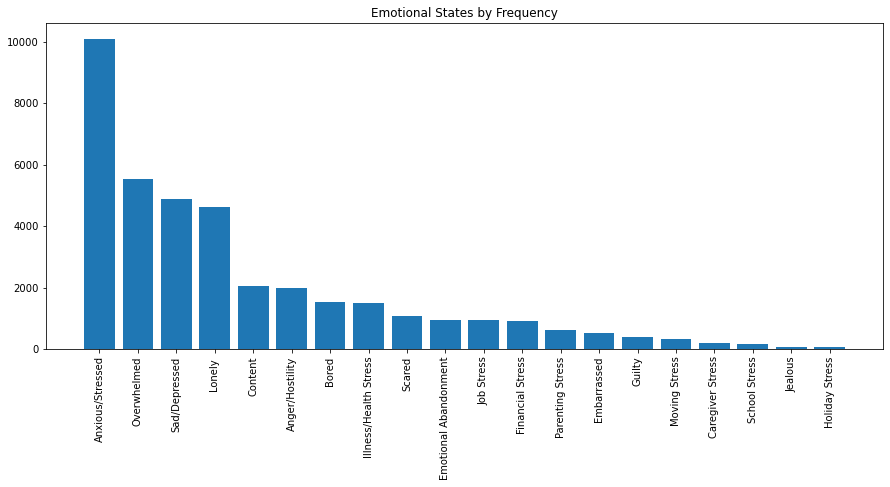

In [54]:
issues_dict = dict(sorted(issues_dict.items(), key = lambda item: item[1], reverse = True))
plt.figure(figsize = (15, 6))
plt.bar(issues_dict.keys(), issues_dict.values())
plt.xticks(rotation = 90)
plt.title('Emotional States by Frequency')

Text(0.5, 1.0, 'Emotional States by Frequency')

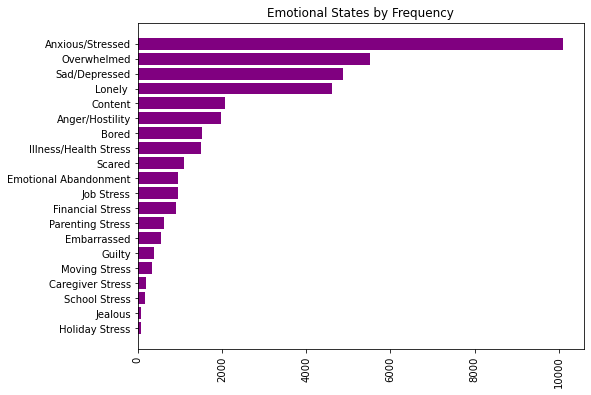

In [55]:
issues_dict = dict(sorted(issues_dict.items(), key = lambda item: item[1]))
plt.figure(figsize = (8, 6))
plt.barh(y = list(issues_dict.keys()), width = list(issues_dict.values()), color = 'purple')
plt.xticks(rotation = 90)
plt.title('Emotional States by Frequency')

In [56]:
#to flatten a list
[issue for sublist in unique_cols_list for issue in sublist]
# what this is actually doing:
# flat_list = []
# for sublist in unique_cols_list:
#     for issue in sublist:
#         flat_list.append(issue)

['Terrorism (Domestic/International)',
 'Harassment',
 'Mass Violence (Domestic/International)',
 'Adult Abused as a Child',
 'Hate Crime',
 'Other Physical Abuse/Neglect',
 'Cult/Ritualistic Abuse',
 'Abuse/Neglect of Spouse/Partner',
 'Pedophile',
 'Child Sexual Abuse',
 'Abuse/Neglect of Parent/Other Family',
 'Rape/Sexual Abuse',
 'Bullying',
 'Child Endangerment',
 'Threat to CIC',
 'Gang Violence',
 'Prejudice',
 'Other Abusive Behavior',
 'Child Abuse/Neglect',
 'Other Criminal Behavior/Corrections/Felony',
 'Embarrassed',
 'Anger/Hostility',
 'Holiday Stress',
 'Anxious/Stressed',
 'Bored',
 'Illness/Health Stress',
 'Caregiver Stress',
 'Guilty',
 'Moving Stress',
 'Emotional Abandonment',
 'Scared',
 'Sad/Depressed',
 'Jealous',
 'Financial Stress',
 'Overwhelmed',
 'Job Stress',
 'Lonely ',
 'Content',
 'Parenting Stress',
 'School Stress',
 'Car Repair',
 'Half Way House/Drug Rehab',
 'Child Support',
 'Transportation',
 'Medication/Health Care',
 'Housing (permanent)',
 'B

In [57]:
risk_life_threating = [
    'Abuse/Neglect Parent/Family',
    'Abuse/Neglect of Spouse/Partner',
    'Child Abuse/Neglect',
    'Child Endangerment',
    'Child Sexual Abuse',
    'Pedophile',
    'Cult/Ritualistic Abuse',
    'Adult Protective Services',
    'Runaway/Missing',
    'Rape/Sexual Abuse',
    'Mass Violence',
    'Terrorism',
    'Non-Suicidal Self Injury',
    'Homicidal Thoughts/Ideations',
    '3rd Party Concern for Homicide',
    'Homicide Plan/Attempt In-Progress',
    'Suicidal Thoughts/Ideations',
    'Suicide Plan/Attempt In-Progress',
    '3rd Party Concern for Suicide',
    'Mobile Crisis',
    'Emergency Medical Services',
    'Emergency (Mental Health)',
    'Overdose',
    'Poisoning',
    'Detoxification',
    'Under the Influence',
    'Street Drug Problem',
    'Medication Concern',
]

In [58]:
def get_all_issues(col_name, df, sep = '; '):
    col = df[col_name]
    issue_list = col.dropna().astype(str).str.split(sep)
    full_list = list(issue_list.sum())
    return full_list

In [59]:
def create_dict_count(col, df):
    col_dict = {}
    col_list = get_all_issues(col, df)
    for item in col_list:
        try:
            col_dict[item] += 1
        except:
            col_dict[item] = 1
    return col_dict

In [60]:
create_dict_count('CRISIS Issues - Suicide', issues)

{'Suicide History/Previous Attempts': 375,
 'CURRENT THOUGHTS/IDEATIONS': 753,
 'Information about SOSL support group': 59,
 'Third party concerned about anothers suicide risk': 800,
 'CURRENT SUICIDAL INTENTION/PLAN/ATTEMPT IN PROGRESS': 97,
 'Chronic Suicidal Thoughts/Ideations': 395,
 'Grief due to Suicide Loss': 71}

In [61]:
issue_cols = list(issues.columns)
create_dict_count(issue_cols[0], issues)

{'Rape/Sexual Abuse': 201,
 'Abuse/Neglect of Spouse/Partner': 149,
 'Adult Abused as a Child': 277,
 'Terrorism (Domestic/International)': 21,
 'Other Physical Abuse/Neglect': 74,
 'Harassment': 189,
 'Bullying': 183,
 'Abuse/Neglect of Parent/Other Family': 158,
 'Other Criminal Behavior/Corrections/Felony': 31,
 'Other Abusive Behavior': 168,
 'Child Sexual Abuse': 43,
 'Child Abuse/Neglect': 25,
 'Mass Violence (Domestic/International)': 8,
 'Prejudice': 9,
 'Cult/Ritualistic Abuse': 16,
 'Gang Violence': 7,
 'Hate Crime': 4,
 'Child Endangerment': 5,
 'Threat to CIC': 3,
 'Pedophile': 3}

In [62]:
issue_cols = list(issues.columns)
issue_cols

['CRISIS Issues - Abusive Behavior',
 'CRISIS Issues - Emotional State',
 'CRISIS Issues - Financial/Basic Needs',
 'CRISIS Issues - Health/Physical',
 'CRISIS Issues - Homicide',
 'CRISIS Issues - Information or Services Needed',
 'CRISIS Issues - Mental Health',
 'CRISIS Issues - No Issue Call',
 'CRISIS Issues - Other Description',
 'CRISIS Issues - Relationships',
 'CRISIS Issues - Substances',
 'CRISIS Issues - Suicide']

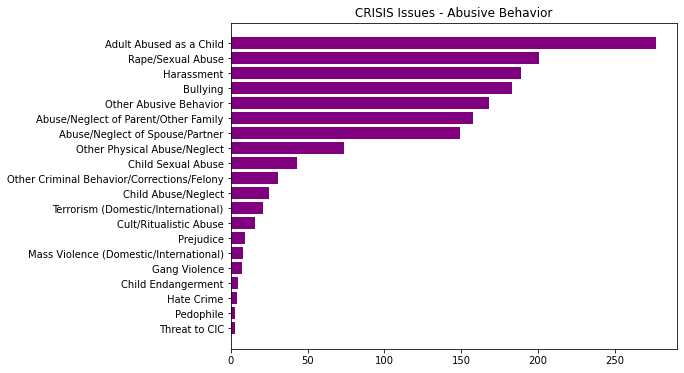

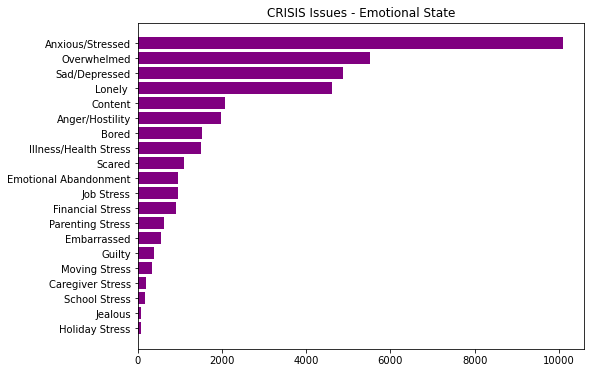

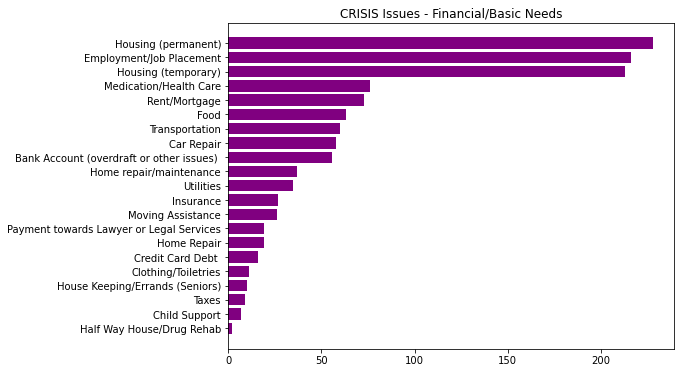

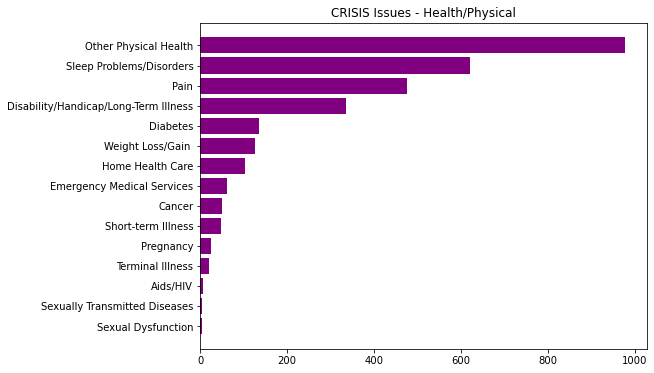

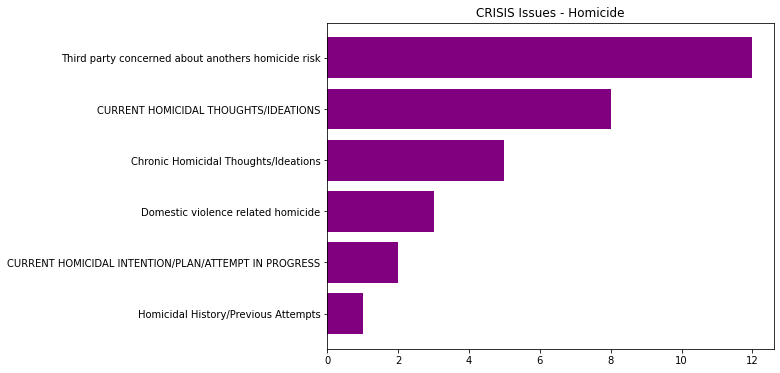

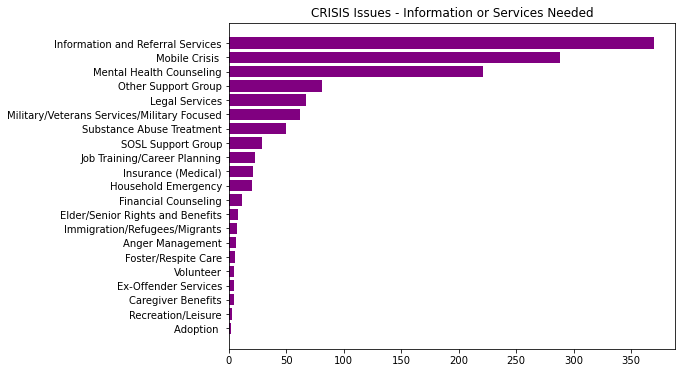

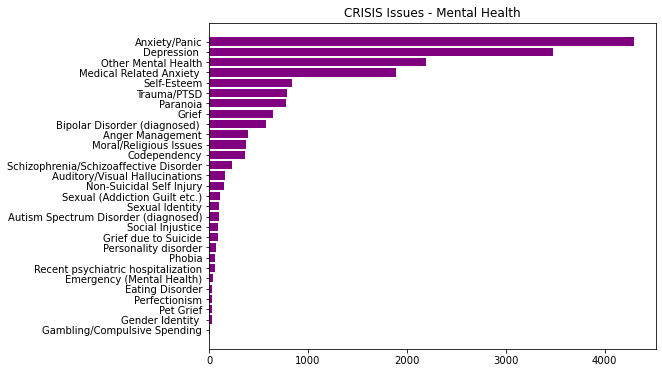

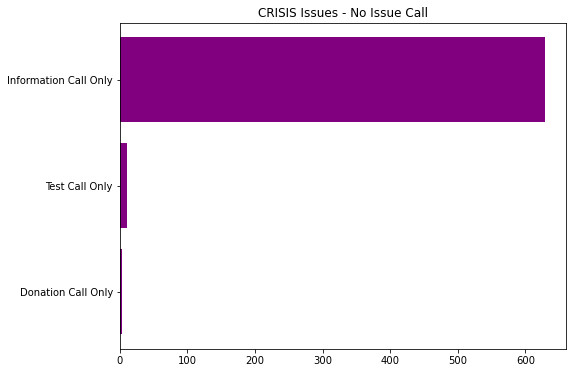

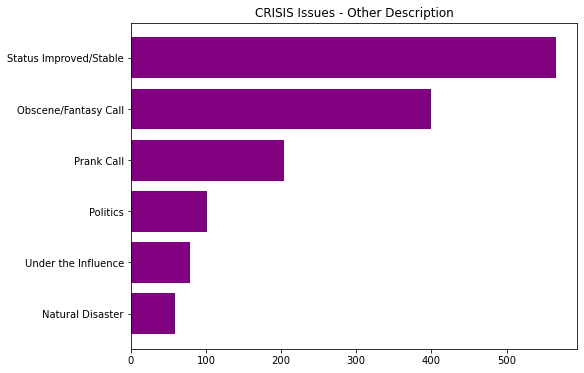

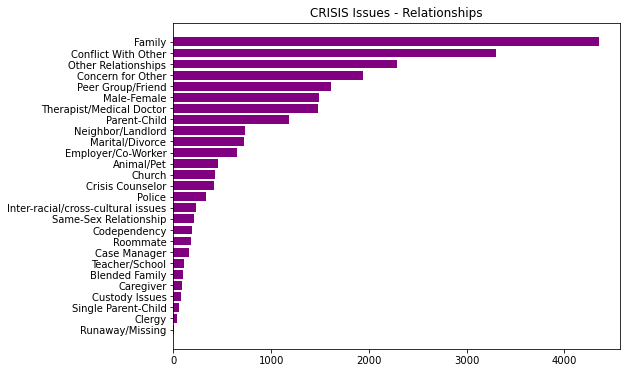

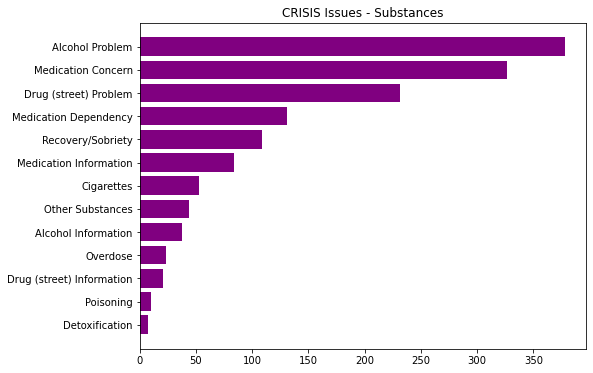

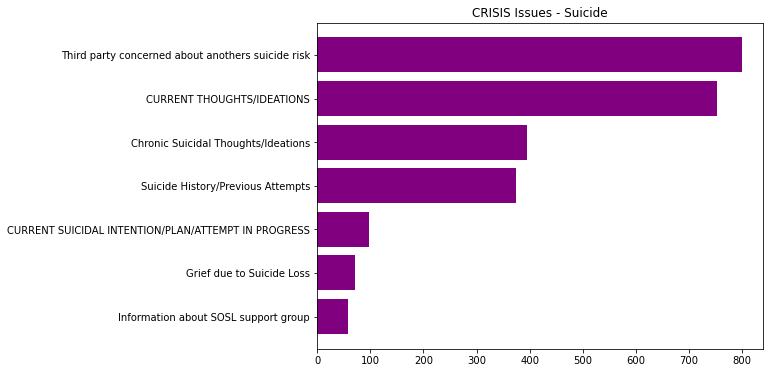

In [63]:
for item in issue_cols:
    my_dict = create_dict_count(item, issues)
    my_dict = dict(sorted(my_dict.items(), key = lambda item: item[1]))
    plt.figure(figsize = (8, 6))
    plt.barh(y = list(my_dict.keys()), width = list(my_dict.values()), color = 'purple')
#     plt.xticks(rotation = 90)
    plt.title(item)